## Calculate dice score

In [13]:
import SimpleITK as sitk
import numpy  as np
import os
from pathlib import Path

In [3]:
for x in range(210):
    os.mkdir(Path("/Users/tanimotoryou/Documents/Documents/lab/slice/3D") / ("case_00"+str(x).zfill(3)))

FileExistsError: [Errno 17] File exists: '/Users/tanimotoryou/Documents/Documents/lab/slice/3D/case_00000'

## From 2D to 3D

In [18]:
for x in range(210):
    if x==5:
        continue
    count0 = -1
    count1 = -1
    image_kid =[]
    image_can = []
    result_kid = []
    result_can = []
    
    for y in range(10):
        p_seg = Path(r"/Users/tanimotoryou/Documents/Documents/lab/slice/label/case_00"+str(x).zfill(3)) / str(y)#正解データ
        p_res = Path(r"/Users/tanimotoryou/Documents/Documents/lab/slice/segmentation/case_00"+str(x).zfill(3)) / str(y)#実験結果
        p_img = Path(r"/Users/tanimotoryou/Documents/Documents/lab/slice/image/case_00"+str(x).zfill(3)) / str(y)#CT


        segs_0 = sorted(list(p_seg.glob("label0*.mha")))
        segs_1 = sorted(list(p_seg.glob("label1*.mha")))
        reses_0 = sorted(list(p_res.glob("image0*.mha")))
        reses_1 = sorted(list(p_res.glob("image1*.mha")))
        imgs_0 = sorted(list(p_res.glob("image0*.mha")))
        imgs_1 = sorted(list(p_res.glob("image1*.mha")))
        
        for seg_0,  res_0, img_0 in zip(segs_0, reses_0,imgs_0):
            count0 += 1
            seg0 = sitk.ReadImage(str(seg_0))
            res0 = sitk.ReadImage(str(res_0))
            img0 = sitk.ReadImage(str(img_0))
            seg_array0 = sitk.GetArrayFromImage(seg0)
            res_array0 = sitk.GetArrayFromImage(res0)
            img_array0 = sitk.GetArrayFromImage(img0)
            
            if count0 > 0:
                segment0 = np.dstack([segment0, seg_array0])
                results0 = np.dstack([results0, res_array0])
                image0 = np.dstack([image0, img_array0])
            
            else:
                segment0 = seg_array0
                results0 = res_array0
                image0 = img_array0
                
        for seg_1,  res_1, img_1 in zip(segs_1, reses_1, imgs_1):
            count1 += 1
            seg1 = sitk.ReadImage(str(seg_1))
            res1 = sitk.ReadImage(str(res_1))
            img1 = sitk.ReadImage(str(img_1))
            seg_array1 = sitk.GetArrayFromImage(seg1)
            res_array1 = sitk.GetArrayFromImage(res1)
            img_array1 = sitk.GetArrayFromImage(img1)
            
            if count1 > 0:
                segment1 = np.dstack([segment1, seg_array1])
                results1 = np.dstack([results1, res_array1])
                image1 = np.dstack([image1, img_array1])
            
            else:
                segment1 = seg_array1
                results1 = res_array1
                image1 = img_array1
                
        segment = np.concatenate([segment0, segment1], axis=-1)
        results = np.concatenate([results0, results1], axis=-1)
        image = np.concatenate([image0, image1], axis=-1)
        
        outfileSeg = Path("/Users/tanimotoryou/Documents/Documents/lab/slice/3D/case_00"+str(x).zfill(3)) / "label.mha" 
        outfileRes = Path("/Users/tanimotoryou/Documents/Documents/lab/slice/3D/case_00"+str(x).zfill(3)) / "result.mha" 
        outfileImg = Path("/Users/tanimotoryou/Documents/Documents/lab/slice/3D/case_00"+str(x).zfill(3)) / "image.mha" 
        
        seg_image = sitk.GetImageFromArray(segment)
        res_image = sitk.GetImageFromArray(results)
        img_image = sitk.GetImageFromArray(image)
        
        seg_image.SetOrigin(seg_image.GetOrigin())
        res_image.SetOrigin(res_image.GetOrigin())
        img_image.SetOrigin(img_image.GetOrigin())
        
        seg_image.SetSpacing(seg_image.GetSpacing())
        res_image.SetSpacing(res_image.GetSpacing())
        img_image.SetSpacing(img_image.GetSpacing())
        
        sitk.WriteImage(seg_image, str(outfileSeg), True)
        sitk.WriteImage(res_image, str(outfileRes), True)
        sitk.WriteImage(img_image, str(outfileImg), True)
    print(segment.shape)
    print("case00_"+str(x).zfill(3) + " done.")

(256, 256, 92)
case00_000 done.


## Caluculate Dice

In [2]:
def DICE(turelabel, result):
    intersection=np.sum(np.minimum(np.equal(turelabel,result),turelabel))
    union = np.count_nonzero(turelabel)+np.count_nonzero(result)
    dice = 2 * intersection / union
   # print("intersection: ",2* intersection)
    #print("union: ", union)
    return dice

def averagenum(num):
    if len(num) == 0:
        return 1.0
    
    else: 
        nsum = 0
        for i in range(len(num)):
            nsum += num[i]

        return nsum / len(num)

In [12]:
##caluculate 3D

whole_dice=[]
kidney_dice = []
cancer_dice = []
skipcount = 0

for x in range(30):
    if x==5:
        skipcount += 1
        continue
    count = -1
    image_kid =[]
    image_can = []
    result_kid = []
    result_can = []
    
    image=sitk.ReadImage(os.path.join("/Users/tanimotoryou/Documents/Documents/lab/slice/3D/case_00"+str(x).zfill(3),"label.mha"))
    result=sitk.ReadImage(os.path.join("/Users/tanimotoryou/Documents/Documents/lab/slice/3D/case_00"+str(x).zfill(3),"result.mha"))
    image_arry = sitk.GetArrayFromImage(image)
    result_arry = sitk.GetArrayFromImage(result)
    #print(np.sum(np.where(result_arry==2,True,False)))


    whole_dice.append(DICE(image_arry,result_arry))

    image_kid = np.where(image_arry==1,1,0)
    image_can = np.where(image_arry==2,2,0)

    result_kid = np.where(result_arry==1,1,0)
    result_can = np.where(result_arry==2,2,0)

        
    kidney_dice.append(DICE(image_kid,result_kid))
    cancer_dice.append(DICE(image_can,result_can))
    

    print("case _00"+str(x).zfill(3)+"<br>")
    print("whole_dice: {}<br>".format(whole_dice[x-skipcount]))
    print("kidney dice: {}<br>".format(kidney_dice[x-skipcount]))
    print("cancer dice: {}<br>".format(cancer_dice[x-skipcount]))
    print("")
    
print("average whole: {}<br>".format(averagenum(whole_dice)))
print("average kidney: {}<br>".format(averagenum(kidney_dice)))
print("average cancer: {}<br>".format(averagenum(cancer_dice)))

case _00000<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00001<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00002<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00003<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00004<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00006<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00007<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00008<br>
whole_dice: 0.999999820371038<br>
kidney dice: 0.999999705331062<br>
cancer dice: 1.0<br>

case _00009<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00010<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00011<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00012<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00013<br>
whole_di

In [5]:
##caluculate 2D
whole_dice=[]
kidney_dice = []
cancer_dice = []


for x in range(25,26):
    if x==5:
        continue
    count = -1
    image_kid =[]
    image_can = []
    result_kid = []
    result_can = []
    
    for y in range(10):
        p_seg = Path(r"/Users/tanimotoryou/Documents/Documents/lab/slice/label/case_00"+str(x).zfill(3)) / str(y)#正解データ
        p_res = Path(r"/Users/tanimotoryou/Documents/Documents/lab/slice/segmentation/case_00"+str(x).zfill(3)) / str(y)#実験結果
        
        m = sorted(list(p_seg.glob("*.mha")))
        l = sorted(list(p_res.glob("*.mha")))
        
        for a, b in zip(m, l):
            count += 1
            
            

            #print(a)
            #print(b)
            image=sitk.ReadImage(str(a))
            result=sitk.ReadImage(str(b))
            image_arry = sitk.GetArrayFromImage(image)
            result_arry = sitk.GetArrayFromImage(result)
            #print(np.sum(np.where(result_arry==2,True,False)))
            
            
            whole_dice.append(DICE(image_arry,result_arry))

            image_k = np.where(image_arry==1,1,0)
            image_c = np.where(image_arry==2,2,0)

            result_k = np.where(result_arry==1,1,0)
            result_c = np.where(result_arry==2,2,0)
            
            if count > 0:
                image_kid = np.dstack([image_kid, image_k])
                image_can = np.dstack([image_can, image_c])
                result_kid = np.dstack([result_kid, result_k])
                result_can = np.dstack([result_can, result_c])
               
            else:
                image_kid = image_k
                image_can = image_c
                result_kid = result_k
                result_can = result_c
            
        #print(np.sum(np.where(result_can==2,True,False)))
    #print(image_kid.shape)
    kidney_dice.append(DICE(image_kid,result_kid))
    cancer_dice.append(DICE(image_can,result_can))
    
#print(count)
#print(wholedice)
print("average whole:",averagenum(whole_dice))
#print("every whole")
print(whole_dice)
print("average kidney: ",averagenum(kidney_dice))
print("every kidney")
print(kidney_dice)
print("average cancer: ",averagenum(cancer_dice))
print("every cancer")
print(cancer_dice)

/Users/tanimotoryou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


average whole: nan
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9977628635346756, 1.0, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan]
average kidney:  0.9999996581810102
every kidney
[0.9999996581810102]
average cancer:  0.9999994758511522
every cancer
[0.9999994758511522]


In [17]:
##slower
num_arry=['000','001','002','003','004',"005","006"]
whole_dice=[]
kidney_dice = []
cancer_dice = []

image_arry_kid = []
result_kid = []
image_arry_can = []
result_can = []

for num in num_arry:
    labelpath=r"C:\Users\VMLAB\Desktop\kidney\kits19\data\case_00{}\segmentation.nii.gz".format(num)
    resultpath=r"C:\Users\VMLAB\Desktop\kidney\segmentedData\nonmask_case_00{}.mha".format(num)
    image=sitk.ReadImage(labelpath)
    result=sitk.ReadImage(resultpath)
    #whole
    image_arry = sitk.GetArrayFromImage(image)
    result_arry = sitk.GetArrayFromImage(result)
    whole_dice.append(DICE(image_arry,result_arry))
    
    for (images,results) in zip(image_arry,result_array):
        for l1,m1 in zip(images,results):
            for l,m in zip(l1,m1):
                if l == 1:
                    image_arry_kid.append(l)
                else:
                    image_arry_kid.append(0)

                if l == 2:
                    image_arry_can.append(2)
                else:
                    iamge_arry_can.append(0)

                if m == 1:
                    result_kid.append(l)
                else:
                    result_kid.append(0)

                if m == 1:
                    result_can.append(2)
                else:
                    result_can.append(0)


    kidney_dice.append(DICE(image_arry_kid,result_kid))
    cancer_dice.append(DICE(image_arry_can,result_can))
    
#print(wholedice)
print("average whole:",averagenum(whole_dice))
print("every whole")
print(whole_dice)
print("average kidney: ",averagenum(kidney_dice))
print("every kidney")
print(kidney_dice)
print("average cancer: ",averagenum(cancer_dice))
print("every cancer")
print(cancer_dice)

RuntimeError: Exception thrown in SimpleITK ReadImage: /scratch/dashboard/SimpleITK-OSX10.6-x86_64-pkg/SimpleITK/Code/IO/src/sitkImageReaderBase.cxx:99:
sitk::ERROR: The file "C:\Users\VMLAB\Desktop\kidney\kits19\data\case_00000\segmentation.nii.gz" does not exist.

## 2DUnet result
case _00000<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00001<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00002<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00003<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00004<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00006<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00007<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00008<br>
whole_dice: 0.999999820371038<br>
kidney dice: 0.999999705331062<br>
cancer dice: 1.0<br>

case _00009<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00010<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00011<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00012<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00013<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00014<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00015<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00016<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00017<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00018<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00019<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00020<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00021<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00022<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00023<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00024<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00025<br>
whole_dice: 0.9999995862108918<br>
kidney dice: 0.9999996581810102<br>
cancer dice: 0.9999994758511522<br>

case _00026<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00027<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00028<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>

case _00029<br>
whole_dice: 1.0<br>
kidney dice: 1.0<br>
cancer dice: 1.0<br>
<hr>
average whole: 0.9999999795373079<br>
average kidney: 0.9999999780521405<br>
average cancer: 0.9999999819259018<br>

## 3DUet original result 

average whole: 0.8630059891064075

every whole

[0.9591196067875296, 0.9520993383239303, 0.8467956040743501, 0.9601632634342647, 0.9056905448290898, 0.4647860972799211, 0.9523874690157663]

average kidney:  0.9470405045689381

every kidney

[0.9780640254771015, 0.9723550184214887, 0.9539591541870345, 0.9581546771583904, 0.9545758310738587, 0.9016873078551152, 0.9104875178095769]

average cancer:  0.14326236188385308

every cancer

[0.0, 0.01055656559732567, 0.14334679887379115, 0.14086105719571854, 0.16740243999539958, 0.272494556352483, 0.2681751151722535]

## 3DUnet result with weight decay

average whole: 0.8508269859383292

every whole

[0.9570119057741051, 0.9193649923248561, 0.8647152845515127, 0.9466173537418437, 0.9179154604735212, 0.40666278392545135, 0.9435011207770142]

average kidney:  0.8612331243462235

every kidney

[0.9707636726283999, 0.9359023560800674, 0.8967651445209858, 0.9721365828253096, 0.9455070781498398, 0.352027851971423, 0.9555291842475386]

average cancer:  0.3300786053137735

every cancer

[0.3729897113175507, 0.0, 0.47862260720778527, 0.4145620243346745, 0.46762071450633175, 0.5767551798300717, 0.0]

## penalty_categorical

In [7]:
import tensorflow as tf

array_tf = tf.convert_to_tensor(a,dtype=tf.float32)

result = tf.reduce_sum(array_tf,[0,1,2])
result2 = tf.reduce_sum(a.sum(0),0)
result3 = tf.reduce_sum(result2,0)
result_pow = tf.pow(result3,1.0/3)

sess = tf.Session()
print(sess.run(result_pow))
result_pow = tf.pow(result,1.0/3)
weight_y = result_pow / tf.reduce_sum(result_pow)
print(sess.run(1/weight_y))
print(sess.run(result))


[[       nan        nan        nan]
 [       nan        nan 0.98497314]
 [       nan        nan 0.80284354]
 [1.47772347        nan        nan]]
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]]
[[-2.2062957  -0.28657302 -4.168716  ]
 [-0.4040414  -0.8846217   0.9555932 ]
 [-2.452169   -1.2380549   0.517479  ]
 [ 3.2268555  -1.5685507  -1.0826172 ]]


## Plot

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
whole_org =  [0.9591196067875296, 0.9520993383239303, 0.8467956040743501, 0.9601632634342647, 0.9056905448290898, 0.4647860972799211, 0.9523874690157663]
kid_org = [0.9780640254771015, 0.9723550184214887, 0.9539591541870345, 0.9581546771583904, 0.9545758310738587, 0.9016873078551152, 0.9104875178095769]
can_org = [0.0, 0.01055656559732567, 0.14334679887379115, 0.14086105719571854, 0.16740243999539958, 0.272494556352483, 0.2681751151722535]
whole_weight = [0.9570119057741051, 0.9193649923248561, 0.8647152845515127, 0.9466173537418437, 0.9179154604735212, 0.40666278392545135, 0.9435011207770142]
kid_weight = [0.9707636726283999, 0.9359023560800674, 0.8967651445209858, 0.9721365828253096, 0.9455070781498398, 0.352027851971423, 0.9555291842475386]
can_weight = [0.3729897113175507, 0.0, 0.47862260720778527, 0.4145620243346745, 0.46762071450633175, 0.5767551798300717, 0.0]

## Original result

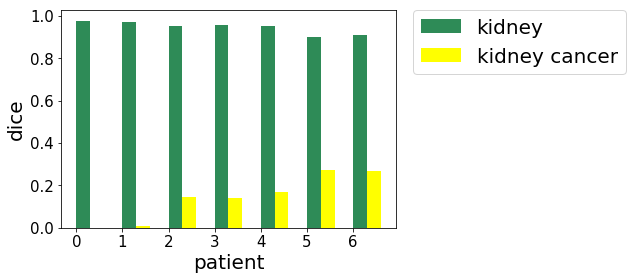

In [11]:
left = np.arange(len(whole_org))
y = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
width = 0.3
#plt.bar(left, whole_org, color="r",width=width, align="center",label="whole")
plt.bar(left+width,kid_org,width=width, color="seagreen", align="center",label="kidney")
plt.bar(left+width+width,can_org,width=width, color="yellow", align="center",label="kidney cancer")
plt.legend(bbox_to_anchor=(1.05,1.0),loc='upper left',borderaxespad=0,fontsize=20)
plt.xticks(left + width/2,left)
plt.xlabel("patient",fontsize=20)
plt.ylabel("dice",fontsize=20)
plt.tick_params(axis="both",labelsize=15.0)

## Result with weight decay

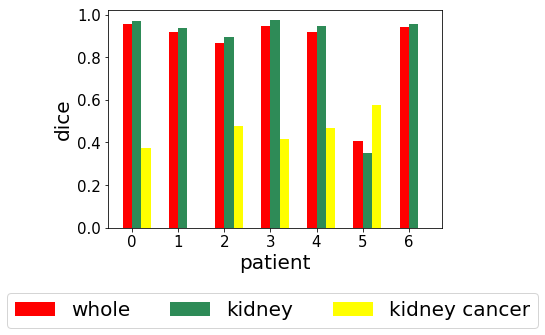

In [105]:
left = np.arange(len(whole_org))
y = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
width = 0.2
plt.bar(left, whole_weight, color="r",width=width, align="center",label="whole")
plt.bar(left+width,kid_weight,width=width, color="seagreen", align="center",label="kidney")
plt.bar(left+width+width,can_weight,width=width, color="yellow", align="center",label="kidney cancer")
plt.legend(bbox_to_anchor=(-0.3,-0.3),loc='upper left',ncol=3,borderaxespad=0,fontsize=20)
plt.xticks(left + width/2,left)
plt.xlabel("patient",fontsize=20)
plt.ylabel("dice",fontsize=20)
plt.tick_params(axis="both",labelsize=15.0)

## Marge result

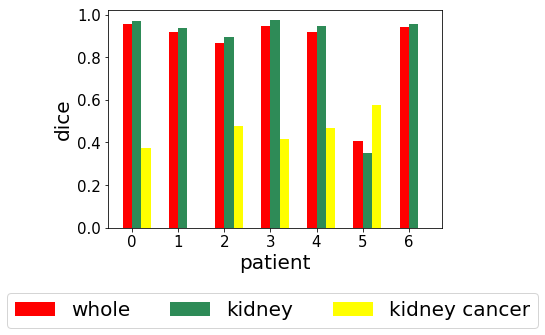

In [106]:
left = np.arange(len(whole_org))
y = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
width = 0.2
#plt.bar(left, whole_org, color="r",width=width, align="center",label="whole",alpha=0.3)
#plt.bar(left+width,kid_org,width=width,color="b", align="center",label="kidney",alpha=0.4)
#plt.bar(left+width+width,can_org,width=width,color="y", align="center",label="kidney cancer",alpha=0.5)

plt.bar(left, whole_weight, color="r",width=width, align="center",label="whole")
plt.bar(left+width,kid_weight,width=width,color="seagreen", align="center",label="kidney")
plt.bar(left+width+width,can_weight,width=width,color="yellow", align="center",label="kidney cancer")

plt.legend(bbox_to_anchor=(-0.3,-0.3),loc='upper left',ncol=3,borderaxespad=0,fontsize=20)
plt.xticks(left + width/2,left)
plt.xlabel("patient",fontsize=20)
plt.ylabel("dice",fontsize=20)
plt.tick_params(axis="both",labelsize=15.0)

## Compare orginal result with result with weight decay

## Kidney

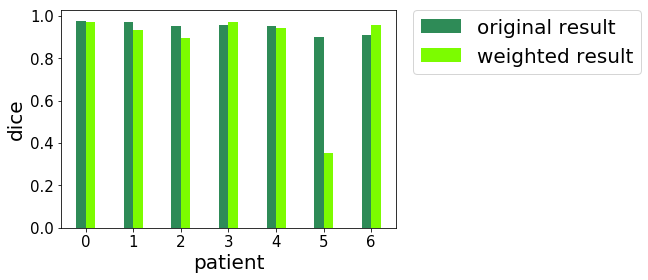

In [12]:
left = np.arange(len(whole_org))
y = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
width = 0.2
#plt.bar(left, whole_org, color="r",width=width, align="center",label="original result")
plt.bar(left,kid_org,width=width,color="seagreen", align="center",label="original result")
#plt.bar(left,can_org,width=width,color="r", align="center",label="original result")

#plt.bar(left+width, whole_weight, color="b",width=width, align="center",label="weighted result")
plt.bar(left+width,kid_weight,width=width,color="lawngreen", align="center",label="weighted result")
#plt.bar(left+width,can_weight,width=width,color='b', align="center",label="weighted result")

plt.legend(bbox_to_anchor=(1.05,1.0),loc='upper left',borderaxespad=0,fontsize=20)
plt.xticks(left + width/2,left)
#plt.yticks(y)
plt.xlabel("patient",fontsize=20)
plt.ylabel("dice",fontsize=20)
plt.tick_params(axis="both",labelsize=15.0)

## Kidney cancer

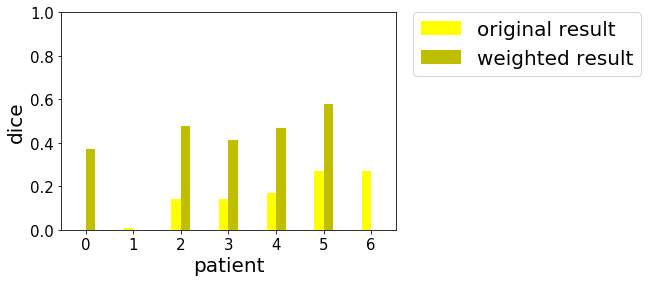

In [13]:
left = np.arange(len(whole_org))
y = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
y = [0.0,0.2,0.4,0.6,0.8,1.0]
width = 0.2
#plt.bar(left, whole_org, color="r",width=width, align="center",label="original result")
#plt.bar(left,kid_org,width=width,color="r", align="center",label="original result")
plt.bar(left,can_org,width=width,color="yellow", align="center",label="original result")

#plt.bar(left+width, whole_weight, color="b",width=width, align="center",label="weighted result")
#plt.bar(left+width,kid_weight,width=width,color="b", align="center",label="weighted result")
plt.bar(left+width,can_weight,width=width,color='y', align="center",label="weighted result")

plt.legend(bbox_to_anchor=(1.05,1.0),loc='upper left',borderaxespad=0,fontsize=20)
plt.xticks(left + width/2,left)
plt.yticks(y)
plt.xlabel("patient",fontsize=20)
plt.ylabel("dice",fontsize=20)
plt.tick_params(axis="both",labelsize=15.0)

In [15]:
import glob
glob.glob(r'C:\*\デスクトップ\')

SyntaxError: EOL while scanning string literal (<ipython-input-15-b43682c66302>, line 2)